In [1]:
import sys
import os
from timeit import default_timer as timer
import torch
from transformers import RobertaTokenizer, RobertaModel, RobertaForMaskedLM, RobertaConfig
import matplotlib.pyplot as plt
# % matplotlib inline
from scipy.spatial.distance import cosine

In [2]:
# Make sure we're in the transformers directory with fine-tuned model output.
os.chdir('/home/jupyter/Notebooks/crystal/NLP/transformers/examples/')
os.getcwd()

'/home/jupyter/Notebooks/crystal/NLP/transformers/examples'

In [3]:
# Adapted from the tutorial at https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
# and Transformers documentation: https://huggingface.co/transformers/model_doc/roberta.html#robertaformaskedlm

In [ ]:
################################### BEGIN TESTING #####################################################

In [9]:
vocab_file = '/home/jupyter/Notebooks/crystal/NLP/MiFace/Python/data/vocab_files/vocab_checked.txt'
vocab = make_vocab(vocab_file)
print(vocab[:10])
print(len(vocab))

['aback', 'abashed', 'abhor', 'abhorred', 'abhorrence', 'abhorrent', 'abominable', 'abound', 'absent', 'absorbed']
2187


In [4]:
tokenizer = RobertaTokenizer.from_pretrained('./output_CC-ab/')
config = RobertaConfig.from_pretrained('./output_CC-ab/')
model = RobertaForMaskedLM.from_pretrained('./output_CC-ab/', config=config)
# Outputting hidden states allows direct access to hidden layers of the model.
# Outputting hidden states must be set to "true" in the config file during fine-tuning.
# config.output_hidden_states = True
model.eval()

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [5]:
# Define a new example sentence with multiple contexts for the word "abhorred"
test_text = "She made an abhorred expression as he began making excuses. He wanted to keep playing, but abhorred the poor sportsmanship of his fellows."

# Split the sentence into tokens.
tokenized_test_text = tokenizer.encode(test_text, add_special_tokens=True)

# Display the words with their indeces.
for t in tokenized_test_text[1:-1]:
        print('{:<12} {:>6,}'.format(tokenizer.decode(t).strip(), t))
        
print(tokenizer.decode(tokenized_test_text))

She             264
made            156
an               41
abhor        35,350
red           2,050
expression    8,151
as               25
he               37
began           880
making          442
excuses      19,791
.                 4
He               91
wanted          770
to                7
keep            489
playing         816
,                 6
but              53
abhor        35,350
red           2,050
the               5
poor          2,129
sports        1,612
manship      17,187
of                9
his              39
fellows      36,304
.                 4
<s> She made an abhorred expression as he began making excuses. He wanted to keep playing, but abhorred the poor sportsmanship of his fellows.</s>


In [26]:
# tokens_tensor = torch.tensor([tokenized_test_text])

In [6]:
input_ids = torch.tensor(tokenized_test_text).unsqueeze(0)  # Batch size 1
with torch.no_grad():
    outputs = model(input_ids, masked_lm_labels=input_ids)
    # Documentation for the "forward" method of RobertaForMaskedLM
    # details what is returned for each index of "outputs."
    print(len(outputs))
    print(outputs[0])  # masked_lm_loss
    print(outputs[1])  # prediction_scores
    print(outputs[2])  # hidden_states

3
tensor(0.5359)
tensor([[[11.8010, -7.9713,  5.8451,  ..., -1.0266, -0.5793,  3.7161],
         [-1.6507, -6.6900,  0.8147,  ..., -3.3047, -0.5577,  0.3626],
         [-0.2727, -2.5576, 10.3142,  ...,  0.8325,  0.3326, -0.6481],
         ...,
         [-0.9761, -4.8639,  2.5566,  ...,  1.0662, -0.4539, -1.8144],
         [ 4.4907, -7.9763,  6.2486,  ..., -1.9367, -1.3210,  1.0627],
         [ 4.3879, -7.9818,  6.2446,  ..., -1.9727, -1.3405,  1.0257]]])
(tensor([[[ 0.1821, -0.0584, -0.0180,  ..., -0.0704,  0.1026, -0.0030],
         [-0.1530, -0.0148,  0.1621,  ..., -0.0165,  0.0989,  0.2619],
         [-0.1659, -0.2194,  0.6360,  ...,  0.0112, -0.6962,  0.0143],
         ...,
         [-0.0298, -0.6782,  0.3548,  ..., -0.1759, -0.1033,  0.3855],
         [ 0.2563,  0.0070,  0.2225,  ..., -0.8431,  0.0814,  0.0141],
         [-0.0843,  0.0270,  0.0268,  ...,  0.3801,  0.0326, -0.1617]]]), tensor([[[-0.0377,  0.0302,  0.0207,  ..., -0.0043,  0.0064, -0.1553],
         [ 0.0960,  0.1445

In [7]:
print ("Number of layers:", len(outputs[2]))
layer_i = 0

print ("Number of batches:", len(outputs[2][layer_i]))
batch_i = 0

print ("Number of tokens:", len(outputs[2][layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(outputs[2][layer_i][batch_i][token_i]))

Number of layers: 13
Number of batches: 1
Number of tokens: 31
Number of hidden units: 768


In [86]:
encoded_layers = outputs[2]

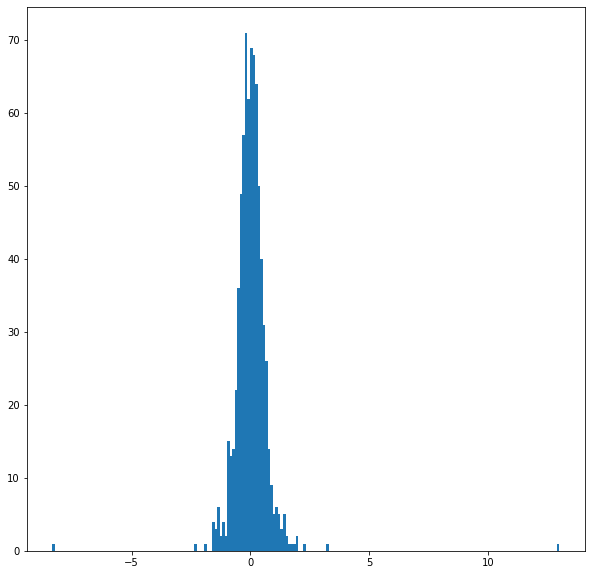

In [91]:
# For our token, select its feature values from layer 5.
token_i = 4
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]
# print(vec)

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [74]:
# `encoded_layers` is a tuple.
print('     Type of encoded_layers: ', type(list(encoded_layers)))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', encoded_layers[0].size())

     Type of encoded_layers:  <class 'list'>
Tensor shape for each layer:  torch.Size([1, 32, 768])


In [75]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(encoded_layers, dim=0)

token_embeddings.size()

torch.Size([13, 1, 32, 768])

In [76]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 32, 768])

In [94]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([32, 13, 768])

In [103]:
for i, token_str in enumerate(tokenized_test_text):
      if tokenizer.decode(token_str).strip() == "disgusted":
        print (i, tokenizer.decode(token_str))

4  disgusted
21  disgusted


In [97]:
# Create token vectors by summing the last 4 layers of the model.
# Stores the token vectors, with shape [32 x 768]
token_vecs_sum = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [99]:
# Extract the last layer's features
token_vecs_last = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Extract the vector from the last layer.
    last_vec = token[-1]
    
    # Use `sum_vec` to represent `token`.
    token_vecs_last.append(last_vec)

print ('Shape is: %d x %d' % (len(token_vecs_last), len(token_vecs_last[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [109]:
# Extract the embedding layer's features (layer 0 is the embedding layer)
token_vecs_embed = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Extract the vector from the last layer.
    embed_vec = token[0]
    
    # Use `sum_vec` to represent `token`.
    token_vecs_embed.append(last_vec)

print ('Shape is: %d x %d' % (len(token_vecs_embed), len(token_vecs_embed[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [129]:
indices = []
for i, token_str in enumerate(tokenized_test_text):
      if tokenizer.decode(token_str).strip() == "disgusted":
        indices.append(i)
print(indices)

[4, 21]


In [130]:
token_vecs_sum_last_four = sum_last_four_token_vecs(token_embeddings)
for i in range(len(indices)):
    print(f'disgusted at index {indices[i]}: {str(token_vecs_sum_last_four[indices[i]][:5])}')

Shape is: 32 x 768
disgusted at index 4: tensor([-0.7637, -1.0375, -0.4840, -0.2251, -0.1792])
disgusted at index 21: tensor([-0.8459, -0.2973, -0.3336, -0.6372, -0.7399])


In [224]:
for i, v in enumerate(vocab):
    print(i, v)

0 open
1 openness
2 opposed
3 oppositional
4 oppressed
5 optimism
6 optimistic
7 ordering
8 orgasmic
9 ornery
10 ouch
11 out
12 outburst
13 outcry
14 outed
15 outlandish
16 outrage
17 outraged
18 outspoken
19 overbearing
20 overexcited
21 overjoyed
22 overshadowed
23 overstrung
24 overwhelmed
25 overworked
26 overwrought
27 pain
28 pained
29 painful
30 painfully
31 panic
32 panicked
33 panicky
34 paralyzed
35 paranoid
36 passionate
37 passive
38 patience
39 patient
40 patronizing
41 pause
42 pausing
43 peaceful
44 peculiar
45 peering
46 peeved
47 peevish
48 pensive
49 peppy
50 perceptive
51 perfidious
52 perky
53 perplexed
54 perplexing
55 persistent
56 personable
57 perturbed
58 perverse
59 pesky
60 pessimism
61 pessimistic
62 pestered
63 petitioning
64 petrified
65 petty
66 petulant
67 picked
68 piercing
69 pinched
70 pious
71 piqued
72 pissed
73 pitiable
74 pitiful
75 pity
76 pitying
77 placated
78 placation
79 placid
80 plain
81 plaintive
82 planning
83 playful
84 playfully
85 plea

In [229]:
v_indices = (102, 145, 309, 316, 410, 698)

start = 12
sections = []
for end in v_indices:
    for i in range(start, end):
#         print(i)
        sections.append(vocab[i])
        start = end + 1
for i in range(start, len(vocab)):
    sections.append(vocab[i])
#     print(i)

for i, v in enumerate(sections):
    print(i, v)

0 outburst
1 outcry
2 outed
3 outlandish
4 outrage
5 outraged
6 outspoken
7 overbearing
8 overexcited
9 overjoyed
10 overshadowed
11 overstrung
12 overwhelmed
13 overworked
14 overwrought
15 pain
16 pained
17 painful
18 painfully
19 panic
20 panicked
21 panicky
22 paralyzed
23 paranoid
24 passionate
25 passive
26 patience
27 patient
28 patronizing
29 pause
30 pausing
31 peaceful
32 peculiar
33 peering
34 peeved
35 peevish
36 pensive
37 peppy
38 perceptive
39 perfidious
40 perky
41 perplexed
42 perplexing
43 persistent
44 personable
45 perturbed
46 perverse
47 pesky
48 pessimism
49 pessimistic
50 pestered
51 petitioning
52 petrified
53 petty
54 petulant
55 picked
56 piercing
57 pinched
58 pious
59 piqued
60 pissed
61 pitiable
62 pitiful
63 pity
64 pitying
65 placated
66 placation
67 placid
68 plain
69 plaintive
70 planning
71 playful
72 playfully
73 pleading
74 pleasant
75 pleased
76 pleasing
77 pleasurable
78 pleasure
79 pleasured
80 pliant
81 plotting
82 poignant
83 pointed
84 poised


In [230]:
vocab = sections

In [111]:
# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the last layer of the model.
diff_disgusted_last = 1 - cosine(token_vecs_last[4], token_vecs_last[21])

# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the embed layer of the model.
diff_disgusted_embed = 1 - cosine(token_vecs_embed[4], token_vecs_embed[21])

# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the sum of the last 4 layers of the model.
diff_disgusted_sum = 1 - cosine(token_vecs_sum_last_four[4], token_vecs_sum_last_four[21])

print('Vector similarity at the last layer:  %.2f' % diff_disgusted_last)
print('Vector similarity at the embed layer:  %.2f' % diff_disgusted_embed)
print('Vector similarity at the embed layer:  %.2f' % diff_disgusted_sum)

Vector similarity at the last layer:  0.91
Vector similarity at the embed layer:  1.00
Vector similarity at the embed layer:  0.89


In [ ]:
############################ END TESTING ##############################################################################

In [10]:
############################ START PRODUCTION: GET CONTEXTUAL EMBEDDINGS ##############################################

In [25]:
tokenizer = RobertaTokenizer.from_pretrained('./output_CC-ab/')
config = RobertaConfig.from_pretrained('./output_CC-ab/')
model = RobertaForMaskedLM.from_pretrained('./output_CC-ab/', config=config)
# Outputting hidden states allows direct access to hidden layers of the model.
# Outputting hidden states must be set to "true" in the config file during fine-tuning.
# config.output_hidden_states = True
model.eval()

context_file = "/home/jupyter/Notebooks/crystal/NLP/transformers/examples/CC_WET_test_ab"
output_file = '/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/'
count_file = '/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/'
vocab_file = '/home/jupyter/Notebooks/crystal/NLP/MiFace/Python/data/vocab_files/FE_vocab_study.txt'
vocab = make_vocab(vocab_file)
# vocab = ["car", "fluent", "donut", "triangular", "jumping", "forever"]

FEATURE_COUNT = 768
LAYER_COUNT = 13

In [ ]:
# Test all layers of the model in the outer loop.
for l in range(LAYER_COUNT):
    output_file = os.path.join(output_file, 'roberta_layer' + str(l) + '_CC_ab_FEvocab.txt')
    count_file = os.path.join(count_file, 'roberta_layer'+ str(l) + '_CC_ab_FEvocab_counts.txt')
    print(output_file, count_file)
    # Process vocabulary words in the middle loop.
    for v in vocab:
        start = timer()
        with open(context_file, 'r') as lines:
            v_sum = torch.zeros([1, FEATURE_COUNT])
            v_tokens = tokenizer.encode(v)
            print(f'\nThere are {len(v_tokens) - 2} tokens in tokenized vocabulary word:')
            for t in v_tokens[1:-1]:
                print(tokenizer.decode(t).strip())
            count_sentence = 0
            count_tensor = 0

            # Process all lines in the context file in the inner loop.
            for line in lines:
                # Check for this vocab word in this line; if found, split the line into individual sentences.
                if v in line.lower().split():
                    for sentence in line.split('.'):
                        if v in sentence.lower():
                            line = sentence
                            count_sentence += 1
                            print(f'\nInstance {count_sentence} of {tokenizer.decode(v_tokens[1:-1]).strip()}.')
                            break
                    # Split the new sentence-based line into tokens.
                    # Use max_length to avoid overflowing the maximum sequence length for the model.
                    tokenized_text = tokenizer.encode(line, add_special_tokens=True, max_length=512)
    #                 print(f'The decoded sentence has {len(tokenized_text)} tokens and is: {tokenizer.decode(tokenized_text)}')
                    indices = []              

                    # Check to see whether the vocab word is found in this particular line.
                    # Initially, some lines may have comprised multiple sentences, which were
                    # broken out individually above.
                    for t in v_tokens[1:-1]:
                        print(f'Looking for vocab token: {tokenizer.decode(t).strip()}')
                        for i, token_str in enumerate(tokenized_text):
    #                         print(f'Next sentence token: {tokenizer.decode(token_str).strip()}')
    #                         print(tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip())
                            if tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip():
                                indices.append(i)               

                    ###################################################################################
                    # If the vocabulary word was found, process the containing line.
                    if indices:

                        # The vocab word was found in this line/sentence, at the locations in indices.
                        print(f'Indices are {indices}')
                        # Get the feature vectors for all tokens in the line/sentence.
                        token_embeddings = create_token_embeddings(tokenized_text)
                        # Sum the last four layers to get embeddings for the line/sentence.
    #                         for t in v_tokens[1:-1]:
    #                             for i, token_str in enumerate(tokenized_text):
    #                                 if (tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip()):
    #                                     print(f'{tokenizer.decode(token_str).strip()} is index {i} in the sentence and {token_str} in the vocabulary.')
                        token_vecs_layer = get_layer_token_vecs(token_embeddings, l)

                        # Get the vocab word's contextual embedding for this line.
                        tensor_layer = torch.zeros([1, FEATURE_COUNT])
                        for i in range(len(indices)):
                            v_index = i % len(v_tokens[1:-1])
                            print(f'{tokenizer.decode(v_tokens[v_index + 1]).strip()} at index {indices[i]}: {token_vecs_layer[indices[i]][:5].tolist()}')
                            tensor_layer += token_vecs_layer[indices[i]]
    #                         print(f'Sum of tensors is: {tensor_layer[0][:5].tolist()} before taking the mean.')

                        # If our vocab word is broken into more than one token, we need to get the mean of the token embeddings.
                        tensor_layer /= len(indices)
    #                     print(f'Sum of tensors is: {tensor_layer[0][:5].tolist()} after taking the mean.')

                        # Add the embedding distilled from this line to the sum of embeddings for all lines.
                        v_sum += tensor_layer
                        count_tensor += 1
                        print(f'Grand sum of {count_tensor} tensor sets is: {v_sum[0][:5].tolist()}')
                    ###################################################################################
                # Stop processing lines once we've found 2000 instances of our vocab word.
                if count_tensor >= 2000:
                    break

            # We're done processing all lines of 512 tokens or less containing our vocab word.
            # Get the mean embedding for the word.
            v_mean = v_sum / count_tensor
            print(f'Mean of tensors is: {v_mean[0][:5]} ({len(v_mean[0])} features in tensor)')
            write_embedding(output_file, v, v_mean)
            try:
                with open(count_file, 'a') as counts:
                    counts.write(v + ', ' + str(count_tensor) + '\n')
                print(f'Saved the count of sentences used to create {v} embedding')
            except:
                print('Wha?! Could not write the sentence count.')
        end = timer()
        print(f'Run time for {v} was {end - start} seconds.')

/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/roberta_layer0_CC_ab_FEvocab.txt /home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/roberta_layer0_CC_ab_FEvocab_counts.txt

There are 4 tokens in tokenized vocabulary word:
st
upe
f
ied

Instance 1 of stupefied.
Looking for vocab token: st
Looking for vocab token: upe
Looking for vocab token: f
Looking for vocab token: ied
Indices are [7, 8, 9, 10]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
st at index 7: [0.03575003892183304, -0.11460660398006439, 0.027454158291220665, -0.3944607973098755, -0.8716771602630615]
upe at index 8: [-0.09149020165205002, 0.8074173331260681, 0.3855031430721283, -0.5496047139167786, -0.23773439228534698]
f at index 9: [-0.03444203734397888, 0.2476247251033783, 0.20708654820919037, -0.30781954526901245, -0.5697895884513855]
ied at index 10: [-0.7753820419311523, 0.7348591089248657, 0.3407038450241089, 0.0600317493081092


Instance 10 of stupefied.
Looking for vocab token: st
Looking for vocab token: upe
Looking for vocab token: f
Looking for vocab token: ied
Indices are [9, 10, 11, 12]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
st at index 9: [-0.048853252083063126, 0.0396420881152153, 0.11904708296060562, -0.34112346172332764, -0.7826144695281982]
upe at index 10: [-0.1634541153907776, 0.8945625424385071, 0.36659878492355347, -0.48876261711120605, -0.15926669538021088]
f at index 11: [-0.05018382519483566, 0.23082523047924042, 0.07402250915765762, -0.23973789811134338, -0.43307217955589294]
ied at index 12: [-0.700916588306427, 0.6841224431991577, 0.2011243849992752, 0.13460682332515717, -0.26930052042007446]
Grand sum of 10 tensor sets is: [-1.9796347618103027, 3.7345645427703857, 1.945509433746338, -2.817237377166748, -4.515600204467773]
Mean of tensors is: tensor([-0.1980,  0.3735,  0.1946, -0.2817, -0.4516]) (768 features in tensor)
Saved the embeddin


Instance 13 of scornful.
Looking for vocab token: scorn
Looking for vocab token: ful
Indices are [9, 10]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
scorn at index 9: [0.269425630569458, 0.03545420616865158, -0.05461975559592247, -0.07031458616256714, -0.0659358873963356]
ful at index 10: [0.2015264928340912, 0.18345920741558075, -0.30529332160949707, -0.09470119327306747, -0.1106271967291832]
Grand sum of 13 tensor sets is: [4.029006004333496, -0.8032960891723633, -3.301621198654175, -1.2931535243988037, -1.2015048265457153]

Instance 14 of scornful.
Looking for vocab token: scorn
Looking for vocab token: ful
Indices are [3, 4]
Size of token embeddings is torch.Size([56, 13, 768])
Shape of summed layers is: 56 x 768
scorn at index 3: [0.36627674102783203, -0.14316527545452118, -0.19937363266944885, -0.09629088640213013, 0.1526590883731842]
ful at index 4: [0.35798221826553345, -0.10207895189523697, -0.5175884962081909, -0.1188832595944404


Instance 9 of disbelieving.
Looking for vocab token: disbel
Looking for vocab token: ieving
Indices are [20, 21]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
disbel at index 20: [0.07954347133636475, -0.28228914737701416, -0.09005226939916611, 0.4328201413154602, 0.17567282915115356]
ieving at index 21: [-0.04953431338071823, 0.5959175229072571, -0.2534565031528473, 0.7466935515403748, 0.11594028770923615]
Grand sum of 9 tensor sets is: [1.0419857501983643, 1.0233014822006226, -2.4119553565979004, 5.074216365814209, 0.24065227806568146]

Instance 10 of disbelieving.
Looking for vocab token: disbel
Looking for vocab token: ieving
Indices are [11, 12]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
disbel at index 11: [0.16937468945980072, -0.2562111020088196, -0.26271650195121765, 0.4445374310016632, 0.1297270804643631]
ieving at index 12: [0.009725146926939487, 0.6559151411056519, -0.422784894704818


Instance 23 of disbelieving.
Looking for vocab token: disbel
Looking for vocab token: ieving
Indices are [11, 12]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
disbel at index 11: [0.16937468945980072, -0.2562111020088196, -0.26271650195121765, 0.4445374310016632, 0.1297270804643631]
ieving at index 12: [0.009725146926939487, 0.6559151411056519, -0.4227848947048187, 0.7929600477218628, 0.038599684834480286]
Grand sum of 23 tensor sets is: [2.0825419425964355, 2.9625957012176514, -6.224160194396973, 13.14229679107666, 1.2996476888656616]

Instance 24 of disbelieving.
Looking for vocab token: disbel
Looking for vocab token: ieving
Indices are [11, 12]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
disbel at index 11: [0.16937468945980072, -0.2562111020088196, -0.26271650195121765, 0.4445374310016632, 0.1297270804643631]
ieving at index 12: [0.009725146926939487, 0.6559151411056519, -0.4227848947048187


Instance 11 of disdainful.
Looking for vocab token: disdain
Looking for vocab token: ful
Indices are [10, 11]
Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
disdain at index 10: [0.22816410660743713, -0.21647578477859497, 0.09232869744300842, -0.24524956941604614, -0.13903789222240448]
ful at index 11: [0.2379736304283142, 0.1258765310049057, -0.41750550270080566, -0.06566362828016281, -0.06395114958286285]
Grand sum of 11 tensor sets is: [3.170426368713379, -2.038356304168701, -2.2051143646240234, -1.6042463779449463, -1.1186376810073853]

Instance 12 of disdainful.
Looking for vocab token: disdain
Looking for vocab token: ful
Indices are [31, 32]
Size of token embeddings is torch.Size([69, 13, 768])
Shape of summed layers is: 69 x 768
disdain at index 31: [0.27385812997817993, -0.4507843255996704, -0.00970850046724081, -0.15431751310825348, -0.04975469782948494]
ful at index 32: [0.2760714888572693, -0.06373338401317596, -0.4551858305931091

Size of token embeddings is torch.Size([80, 13, 768])
Shape of summed layers is: 80 x 768
revol at index 72: [-0.08604596555233002, 0.2170092612504959, 0.08129561692476273, 0.7970855236053467, -0.1423124372959137]
Grand sum of 5 tensor sets is: [0.3548086881637573, 1.3155171871185303, -0.2815430760383606, 3.204652786254883, -1.4392116069793701]

Instance 6 of revolted.
Looking for vocab token: revol
Looking for vocab token: ted
Indices are [30, 31]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
revol at index 30: [0.0899059921503067, 0.29394304752349854, -0.4234202206134796, 0.5648048520088196, -0.2484634667634964]
ted at index 31: [-0.10318519920110703, 0.19044896960258484, 0.18864706158638, 0.9064261317253113, -0.12488071620464325]
Grand sum of 6 tensor sets is: [0.34816908836364746, 1.5577131509780884, -0.3989296555519104, 3.9402682781219482, -1.62588369846344]

Instance 7 of revolted.
Looking for vocab token: revol
Looking for vocab token:


Instance 20 of revolted.
Looking for vocab token: revol
Looking for vocab token: ted
Indices are [30, 31]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
revol at index 30: [0.0899059921503067, 0.29394304752349854, -0.4234202206134796, 0.5648048520088196, -0.2484634667634964]
ted at index 31: [-0.10318519920110703, 0.19044896960258484, 0.18864706158638, 0.9064261317253113, -0.12488071620464325]
Grand sum of 20 tensor sets is: [1.0426217317581177, 4.625414848327637, -1.7311153411865234, 13.328903198242188, -5.030792236328125]

Instance 21 of revolted.
Looking for vocab token: revol
Looking for vocab token: ted
Indices are [15, 16]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
revol at index 15: [0.3643261790275574, 0.24691042304039001, -0.5175224542617798, 0.4715615510940552, -0.4449954628944397]
ted at index 16: [0.013382427394390106, 0.27064576745033264, 0.28350210189819336, 0.7983414530754089, -0.3

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
m at index 3: [-0.006685416679829359, -0.021154604852199554, -0.004801646340638399, -0.47193872928619385, 0.5639755129814148]
iff at index 4: [0.007991121150553226, 0.33285632729530334, -0.12941962480545044, -0.475277304649353, 0.3111512064933777]
ed at index 5: [-0.00597818149253726, 0.02011759579181671, 0.3457169532775879, -0.5830950736999512, -0.3284130394458771]
Grand sum of 7 tensor sets is: [-0.2754282057285309, 1.3557730913162231, 0.9079107642173767, -3.3813960552215576, 0.8949683904647827]

Instance 8 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [12, 13, 14]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
m at index 12: [-0.07761096954345703, 0.15127113461494446, -0.024235479533672333, -0.32656899094581604, 0.5169046521186829]
iff at index 13: [0.01807405799627304, 0.4808503985404968, -0


Instance 19 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [4, 5, 6]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
m at index 4: [0.0067582582123577595, -0.09557633846998215, -0.09731962531805038, -0.43155065178871155, 0.5228584408760071]
iff at index 5: [0.043759968131780624, 0.3285875618457794, -0.08919121325016022, -0.5082634091377258, 0.20289663970470428]
ed at index 6: [-0.056619588285684586, 0.0369136817753315, 0.41732659935951233, -0.5721604228019714, -0.4233616888523102]
Grand sum of 19 tensor sets is: [-1.0188167095184326, 3.9560134410858154, 2.8157060146331787, -9.290523529052734, 2.139431953430176]

Instance 20 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [3, 4, 5]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
m at index 3: [-0.006685416679829359, -0.02115460485219955


Instance 30 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [10, 11, 12]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
m at index 10: [-0.15813544392585754, 0.20521560311317444, 0.1262347251176834, -0.40515226125717163, 0.4312993884086609]
iff at index 11: [-0.10643339902162552, 0.5532177090644836, -0.033954549580812454, -0.42699792981147766, 0.2745823264122009]
ed at index 12: [-0.12913145124912262, 0.2687171995639801, 0.3759990930557251, -0.4428844451904297, -0.21889469027519226]
Grand sum of 30 tensor sets is: [-1.9843807220458984, 6.447296619415283, 4.840519428253174, -14.73660659790039, 2.837721586227417]

Instance 31 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [6, 7, 8, 9]
Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
m at index 6: [0.21373969316482544, -0.0212054811418056


Instance 41 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [38, 39, 40]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
m at index 38: [-0.11889651417732239, 0.19070138037204742, 0.1406933218240738, -0.41678565740585327, 0.38747164607048035]
iff at index 39: [-0.1012682393193245, 0.6376030445098877, 0.05513632297515869, -0.41119384765625, 0.18973298370838165]
ed at index 40: [-0.1341499239206314, 0.2945246994495392, 0.4267580807209015, -0.4972723722457886, -0.19456084072589874]
Grand sum of 41 tensor sets is: [-2.585556983947754, 8.627540588378906, 6.477460861206055, -20.12107276916504, 3.6431071758270264]

Instance 42 of miffed.
Looking for vocab token: m
Looking for vocab token: iff
Looking for vocab token: ed
Indices are [38, 39, 40]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
m at index 38: [-0.11889651417732239, 0.19070138037204742, 0


Instance 2 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [4, 5]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
a at index 4: [0.19847142696380615, -0.2595764398574829, 0.06753011792898178, 0.3446672558784485, 0.14882893860340118]
gh at index 5: [0.19310341775417328, -0.07692137360572815, 0.42563214898109436, -0.08696416020393372, 0.09707099944353104]
Grand sum of 2 tensor sets is: [0.09828386455774307, -0.30308258533477783, 0.4326278567314148, 0.2749370038509369, 0.18243172764778137]

Instance 3 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [4, 5, 6]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
a at index 4: [-0.1285918951034546, -0.3062111437320709, -0.19252677261829376, 0.1195991113781929, -0.17762400209903717]
gh at index 5: [0.23521406948566437, -0.26375919580459595, 0.10738


Instance 14 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [14, 15, 16]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
a at index 14: [-0.09580081701278687, -0.15777067840099335, -0.1497257649898529, 0.16931277513504028, -0.3037238121032715]
gh at index 15: [0.24310992658138275, -0.13886043429374695, 0.13857275247573853, 0.35715070366859436, -0.03903542459011078]
ast at index 16: [0.16074274480342865, 0.06950560957193375, 0.588326632976532, -0.06214992329478264, -0.021208474412560463]
Grand sum of 14 tensor sets is: [0.47294265031814575, -1.881661295890808, 2.8092334270477295, 1.8221544027328491, -0.736620306968689]

Instance 15 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [8, 9, 10]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
a at index 8: [-0.2136901617050171, -0.081443868577


Instance 25 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [6, 7, 8]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
a at index 6: [-0.14138852059841156, -0.29307833313941956, -0.06635850667953491, 0.09358702600002289, -0.41458630561828613]
gh at index 7: [0.17651614546775818, -0.16831035912036896, 0.19937334954738617, 0.2853218615055084, -0.0906359925866127]
ast at index 8: [0.08485588431358337, 0.11072734743356705, 0.6097180843353271, -0.10002946853637695, 0.034542281180620193]
Grand sum of 25 tensor sets is: [0.7646939158439636, -3.101757526397705, 4.936209678649902, 3.2030975818634033, -1.4689593315124512]

Instance 26 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [3, 24, 4, 5]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
a at index 3: [-0.14307676255702972, -0.223818466067314


Instance 36 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [6, 37, 38, 39]
Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
a at index 6: [-0.14138852059841156, -0.29307833313941956, -0.06635850667953491, 0.09358702600002289, -0.41458630561828613]
gh at index 37: [-0.2069113552570343, -0.0541483610868454, 0.0621517114341259, 0.10194684565067291, -0.4576115012168884]
ast at index 38: [0.08693711459636688, -0.004811360500752926, 0.2802188992500305, 0.3603886067867279, 0.026785489171743393]
a at index 39: [0.04573587328195572, 0.2328082025051117, 0.567827045917511, 0.011515707708895206, 0.08381512761116028]
Grand sum of 36 tensor sets is: [1.0635861158370972, -4.662840366363525, 6.809254169464111, 4.5826802253723145, -2.0432841777801514]

Instance 37 of aghast.
Looking for vocab token: a
Looking for vocab token: gh
Looking for vocab token: ast
Indices are [2, 21, 22, 23]
Size of token emb


Instance 12 of incensed.
Looking for vocab token: inc
Looking for vocab token: ensed
Indices are [11]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
inc at index 11: [-0.40446028113365173, 0.9285476207733154, -0.07006118446588516, 0.4039221405982971, -0.12192162126302719]
Grand sum of 12 tensor sets is: [-3.8087713718414307, 3.3677821159362793, 0.8488291501998901, -1.7844066619873047, 0.049761511385440826]

Instance 13 of incensed.
Looking for vocab token: inc
Looking for vocab token: ensed
Indices are [4, 5]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is: 8 x 768
inc at index 4: [-0.24025750160217285, -0.46274077892303467, 0.10796200484037399, -0.7379381060600281, 0.3622732162475586]
ensed at index 5: [-0.25746333599090576, 0.7113210558891296, -0.12361463159322739, 0.3200969696044922, -0.18930353224277496]
Grand sum of 13 tensor sets is: [-4.057631969451904, 3.492072343826294, 0.8410028219223022, -1.9933272600


Instance 27 of incensed.
Looking for vocab token: inc
Looking for vocab token: ensed
Indices are [3, 4]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
inc at index 3: [-0.25286856293678284, -0.39469826221466064, 0.19481894373893738, -0.7790923714637756, 0.40252310037612915]
ensed at index 4: [-0.29204225540161133, 0.7126227617263794, -0.16194111108779907, 0.3523130714893341, -0.0841783657670021]
Grand sum of 27 tensor sets is: [-8.681414604187012, 7.4284162521362305, 2.2881288528442383, -4.277918815612793, 0.520896852016449]

Instance 28 of incensed.
Looking for vocab token: inc
Looking for vocab token: ensed
Indices are [4, 5]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
inc at index 4: [-0.24025750160217285, -0.46274077892303467, 0.10796200484037399, -0.7379381060600281, 0.3622732162475586]
ensed at index 5: [-0.25746333599090576, 0.7113210558891296, -0.12361463159322739, 0.3200969696044922, -0.1

Looking for vocab token: inc
Looking for vocab token: ensed
Indices are [30, 31]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
inc at index 30: [-0.4850313663482666, -0.28942543268203735, 0.28368479013442993, -0.6335914134979248, 0.3756912052631378]
ensed at index 31: [-0.39712733030319214, 0.7776569724082947, -0.05319858714938164, 0.45228636264801025, -0.08842190355062485]
Grand sum of 42 tensor sets is: [-13.726103782653809, 11.181748390197754, 3.544403314590454, -6.730956077575684, 1.5647767782211304]

Instance 43 of incensed.
Looking for vocab token: inc
Looking for vocab token: ensed
Indices are [10, 11]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
inc at index 10: [-0.3947125971317291, -0.1826370507478714, 0.31750011444091797, -0.7163096070289612, 0.2781168818473816]
ensed at index 11: [-0.40446028113365173, 0.9285476207733154, -0.07006118446588516, 0.4039221405982971, -0.12192162126302719]
G

Mean of tensors is: tensor([-0.3316,  0.2557,  0.0885, -0.1707,  0.0355]) (768 features in tensor)
Saved the embedding for incensed.
Saved the count of sentences used to create incensed embedding
Run time for incensed was 29.609456723555923 seconds.

There are 2 tokens in tokenized vocabulary word:
de
jected

Instance 1 of dejected.
Looking for vocab token: de
Looking for vocab token: jected
Indices are [10, 11]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
de at index 10: [-0.3145482838153839, -0.14059782028198242, -0.10443446040153503, -0.21096700429916382, 0.39486733078956604]
jected at index 11: [0.11090409755706787, 0.7292219400405884, 0.3420615792274475, 0.6371817588806152, 0.3599574565887451]
Grand sum of 1 tensor sets is: [-0.10182209312915802, 0.294312059879303, 0.11881355941295624, 0.2131073772907257, 0.3774123787879944]

Instance 2 of dejected.
Looking for vocab token: de
Looking for vocab token: jected
Indices are [8, 9]
Size of t


Instance 15 of dejected.
Looking for vocab token: de
Looking for vocab token: jected
Indices are [5]
Size of token embeddings is torch.Size([126, 13, 768])
Shape of summed layers is: 126 x 768
de at index 5: [0.25858601927757263, 0.5024096369743347, 0.28328779339790344, 0.5464159846305847, 0.287295937538147]
Grand sum of 15 tensor sets is: [-0.012194156646728516, 3.2464847564697266, 1.919073224067688, 2.763302803039551, 4.7171783447265625]

Instance 16 of dejected.
Looking for vocab token: de
Looking for vocab token: jected
Indices are [23, 24]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
de at index 23: [-0.2589358985424042, -0.4500984847545624, -0.20555391907691956, -0.2284574955701828, 0.5041234493255615]
jected at index 24: [0.13504882156848907, 0.4773893654346466, 0.3352481424808502, 0.5487073659896851, 0.3035319149494171]
Grand sum of 16 tensor sets is: [-0.07413769513368607, 3.2601301670074463, 1.9839203357696533, 2.9234278202056885,


Instance 30 of dejected.
Looking for vocab token: de
Looking for vocab token: jected
Indices are [4, 5]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
de at index 4: [-0.14897868037223816, -0.44439610838890076, -0.3301480710506439, -0.23731261491775513, 0.4872290790081024]
jected at index 5: [0.25858601927757263, 0.5024096369743347, 0.28328779339790344, 0.5464159846305847, 0.287295937538147]
Grand sum of 30 tensor sets is: [-0.7093997001647949, 6.079016208648682, 3.9240055084228516, 5.726962566375732, 9.875991821289062]

Instance 31 of dejected.
Looking for vocab token: de
Looking for vocab token: jected
Indices are [21, 22]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
de at index 21: [-0.29789096117019653, -0.25395190715789795, -0.07080546766519547, -0.17170687019824982, 0.563083291053772]
jected at index 22: [0.15757186710834503, 0.5378300547599792, 0.35880768299102783, 0.6185804009437561, 0.4565


Instance 8 of repulsed.
Looking for vocab token: rep
Looking for vocab token: uls
Looking for vocab token: ed
Indices are [18, 19, 20]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
rep at index 18: [-0.046948738396167755, 0.4847017824649811, -0.32100528478622437, -0.014809917658567429, -0.16984184086322784]
uls at index 19: [0.16412244737148285, -0.08916684240102768, 0.3370359241962433, -0.13804838061332703, -0.7957560420036316]
ed at index 20: [-0.25997719168663025, 0.2339017540216446, 0.57988041639328, -0.4998796284198761, -0.20503008365631104]
Grand sum of 8 tensor sets is: [0.2298945188522339, 1.3952722549438477, 0.20109331607818604, -1.5925383567810059, -2.9318928718566895]

Instance 9 of repulsed.
Looking for vocab token: rep
Looking for vocab token: uls
Looking for vocab token: ed
Indices are [114, 115, 116]
Size of token embeddings is torch.Size([127, 13, 768])
Shape of summed layers is: 127 x 768
rep at index 114: [0.003871798748150


Instance 20 of repulsed.
Looking for vocab token: rep
Looking for vocab token: uls
Looking for vocab token: ed
Indices are [3, 4, 5]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
rep at index 3: [0.039311591535806656, 0.3477824926376343, -0.5717908143997192, -0.03704845532774925, 0.07432796061038971]
uls at index 4: [0.3076064884662628, -0.32684916257858276, 0.050854530185461044, -0.1595795750617981, -0.6579374074935913]
ed at index 5: [-0.00597818149253726, 0.02011759579181671, 0.3457169532775879, -0.5830950736999512, -0.3284130394458771]
Grand sum of 20 tensor sets is: [0.5735706090927124, 2.4045724868774414, 1.301249384880066, -5.063548564910889, -7.4436235427856445]

Instance 21 of repulsed.
Looking for vocab token: rep
Looking for vocab token: uls
Looking for vocab token: ed
Indices are [47, 48, 49]
Size of token embeddings is torch.Size([60, 13, 768])
Shape of summed layers is: 60 x 768
rep at index 47: [-0.053882017731666565, 0.439329


Instance 32 of repulsed.
Looking for vocab token: rep
Looking for vocab token: uls
Looking for vocab token: ed
Indices are [7, 8]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
rep at index 7: [0.28716710209846497, -0.239206001162529, 0.1784479022026062, -0.21735213696956635, -0.8909525275230408]
uls at index 8: [-0.12241041660308838, 0.22412818670272827, 0.5480394959449768, -0.5966052412986755, -0.39566269516944885]
Grand sum of 32 tensor sets is: [0.9846199154853821, 3.9597151279449463, 2.528658390045166, -8.128935813903809, -12.512443542480469]

Instance 33 of repulsed.
Looking for vocab token: rep
Looking for vocab token: uls
Looking for vocab token: ed
Indices are [14, 15, 16]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
rep at index 14: [0.07993436604738235, 0.40594249963760376, -0.6242442727088928, 0.04279540106654167, -0.07018368691205978]
uls at index 15: [0.3515946865081787, -0.2108193635

In [14]:
def make_vocab(vocab_file):
    vocab = []
    with open(vocab_file, 'r') as v:
        vocab = v.read().splitlines()
    return vocab

In [15]:
def create_token_embeddings(tokenized_text):
    input_ids = torch.tensor(tokenized_text).unsqueeze(0)  # Batch size 1
    with torch.no_grad():
        outputs = model(input_ids, masked_lm_labels=input_ids)
        encoded_layers = outputs[2]
        token_embeddings = torch.stack(encoded_layers, dim=0)
        token_embeddings = torch.squeeze(token_embeddings, dim=1)
        token_embeddings = token_embeddings.permute(1,0,2)
        print(f'Size of token embeddings is {token_embeddings.size()}')
        return token_embeddings

In [16]:
# Sum the last 4 layers' features
def sum_last_four_token_vecs(token_embeddings):
    token_vecs_sum_last_four = []

    # For each token in the sentence...
    for token in token_embeddings:
        # `token` is a [13 x 768] tensor
        # Sum the vectors from the last 4 layers.
        sum_vec = torch.sum(token[-4:], dim=0)

        # Use `sum_vec` to represent `token`.
        token_vecs_sum_last_four.append(sum_vec)

    print ('Shape of summed layers is: %d x %d' % (len(token_vecs_sum_last_four), len(token_vecs_sum_last_four[0])))
    # Shape is: <token count> x 768
    return token_vecs_sum_last_four

In [17]:
# Return a single layer of the model.
def get_layer_token_vecs(token_embeddings, layer_number):
    token_vecs_layer = []

    # For each token in the sentence...
    for token in token_embeddings:
        # `token` is a [13 x 768] tensor
        # Sum the vectors from the last 4 layers.
        layer_vec = token[layer_number]

        # Use `sum_vec` to represent `token`.
        token_vecs_layer.append(layer_vec)

    print ('Shape of summed layers is: %d x %d' % (len(token_vecs_layer), len(token_vecs_layer[0])))
    # Shape is: <token count> x 768
    return token_vecs_layer

In [18]:
def write_embedding(embeddings_file, vocab_word, contextual_embedding):
    try:
        with open(embeddings_file, 'a') as f:
            f.write(vocab_word)
            for value in contextual_embedding[0]:
                f.write(' ' + str(value.item()))
            f.write('\n')
        print(f'Saved the embedding for {vocab_word}.')
    except:
        print('Oh no! Unable to write to the embeddings file.')